Estrategias

In [2]:
import pandas as pd
%matplotlib widget
import numpy as np
import yfinance as yf
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import ta
import warnings
warnings.filterwarnings("ignore")
from typing import Dict, List, Tuple
from datetime import datetime

c:\Users\ussaa\AppData\Local\Programs\Python\Python313\Lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [3]:
# El código aquí te permitirá cambiar los gráficos a modo oscuro para aquellos que optéis por programar en modo oscuro
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cycler
colors = cycler('color',
                ['#669FEE', '#66EE91', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('figure', facecolor='#313233')
plt.rc('axes', facecolor="#313233", edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors,
       labelcolor='gray')
plt.rc('grid', color='474A4A', linestyle='solid')
plt.rc('xtick', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('legend', facecolor="#313233", edgecolor="#313233")
plt.rc("text", color="#C9C9C9")
plt.rcParams['figure.figsize'] = [20, 8]

In [4]:
#tickers = ["AAPL", "MSFT", "TSLA", "NVDA", "SPY", "ETH-USD", 'ADA-USD', 'SOL-USD', 'DOGE-USD', 'BNB-USD', LTC-USD, 'SHIB-USD']
df = yf.download("ICLN", start="2010-01-01")

# SOLUCIÓN AL PROBLEMA MULTIINDEX
# Verificar si el DataFrame tiene MultiIndex en columnas
print("Estructura original de columnas:")
print(df.columns)
print("Tipo de columnas:", type(df.columns))

# Si tiene MultiIndex, aplanar las columnas
if isinstance(df.columns, pd.MultiIndex):
    # Aplanar el MultiIndex tomando solo el primer nivel
    df.columns = df.columns.get_level_values(0)
    print("\nColumnas después de aplanar:")
    print(df.columns)

# Alternativamente, puedes usar este enfoque más directo:
# df.columns = ['open', 'high', 'low', 'close', 'adj_close', 'volume']

# Creamos una columna de fecha para dibujar el Candlestick más tarde
df['date'] = pd.to_datetime(df.index)
df['date'] = df['date'].apply(mpl_dates.date2num)

# Cambiar el nombre de las columnas a minúsculas
df = df.rename(columns={
    'Open': 'open', 
    'High': 'high', 
    'Low': 'low', 
    'Close': 'close', 
    'Adj Close': 'adj_close',
    'Volume': 'volume'
})


[*********************100%***********************]  1 of 1 completed

Estructura original de columnas:
MultiIndex([( 'Close', 'ICLN'),
            (  'High', 'ICLN'),
            (   'Low', 'ICLN'),
            (  'Open', 'ICLN'),
            ('Volume', 'ICLN')],
           names=['Price', 'Ticker'])
Tipo de columnas: <class 'pandas.core.indexes.multi.MultiIndex'>

Columnas después de aplanar:
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


In [5]:
window = 27
# Crear media móvil simple 
df["SMA slow"] = df["close"].rolling(window).mean()
# Media Móvil Exponencial (EMA) - da más peso a los precios recientes
df["EMA"] = df["close"].ewm(span=window, adjust=False).mean()
# Media Móvil Ponderada (WMA) - peso lineal decreciente
def weighted_moving_average(series, period):
    weights = np.arange(1, period + 1)
    return series.rolling(period).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

df["WMA"] = weighted_moving_average(df["close"], window)


df['RSI'] = ta.momentum.rsi(df["WMA"], window=80)

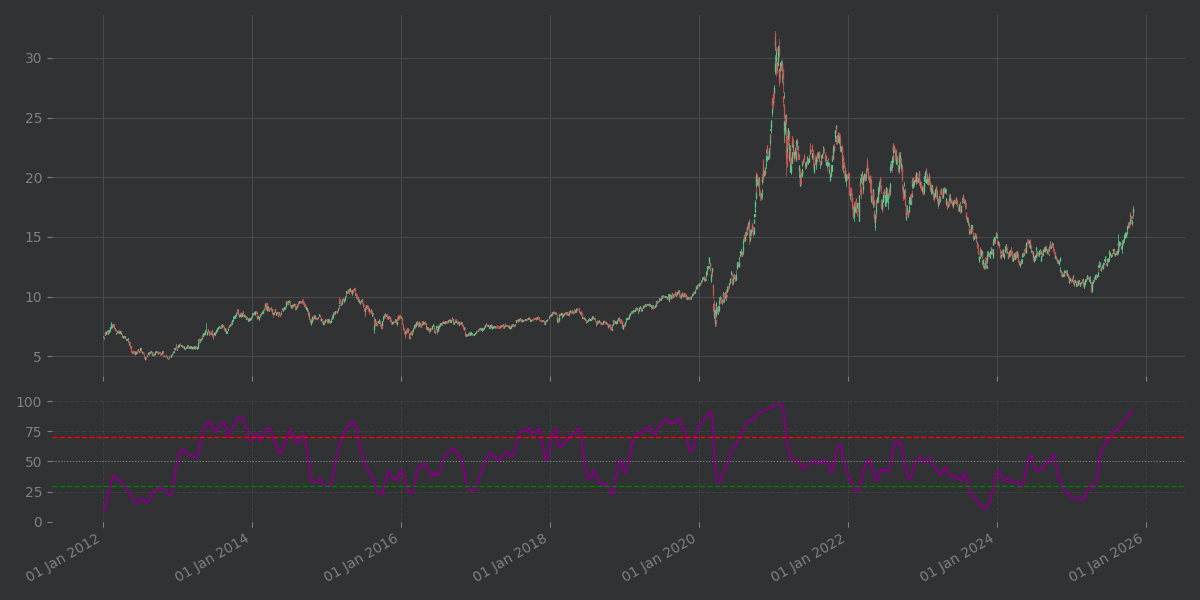

In [6]:

df_bis = df.loc['2012':]

# Inicializar el gráfico
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Dibujar el candlestick
candlestick_ohlc(ax1,df_bis[["date", "open", "high", "low", "close"]].values,width=0.6, colorup='#57CE95', colordown='#CE5757', alpha=0.8)
ax2.plot(df_bis['RSI'].index, df_bis['RSI'], color='purple')
# Nivel de Sobrecompra (70)
ax2.axhline(70, color='red', linestyle='--', linewidth=1)
# Nivel de Sobreventa (30)
ax2.axhline(30, color='green', linestyle='--', linewidth=1)
# Nivel Central (50)
ax2.axhline(50, color='gray', linestyle=':', linewidth=0.8)
ax2.set_ylim(0, 100) # El RSI siempre va de 0 a 100
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(loc='upper left')
# Poner la fecha como eje x
date_format = mpl_dates.DateFormatter('%d %b %Y')
ax1.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

# Estrategia

In [37]:
df = yf.download("SOL-USD", start="2010-01-01")

# Solución al problema MultiIndex
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)

# Preparar DataFrame
df['date'] = pd.to_datetime(df.index)
df['date_num'] = df['date'].apply(mpl_dates.date2num)

# Renombrar columnas
df = df.rename(columns={
    'Open': 'open', 
    'High': 'high', 
    'Low': 'low', 
    'Close': 'close', 
    'Adj Close': 'adj_close',
    'Volume': 'volume'
})

# Calcular indicadores
window = 150
df["SMA slow"] = df["close"].rolling(window).mean()
df["EMA"] = df["close"].ewm(span=window, adjust=False).mean()

def weighted_moving_average(series, period):
    weights = np.arange(1, period + 1)
    return series.rolling(period).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)

df["WMA"] = weighted_moving_average(df["close"], window)
df['RSI'] = ta.momentum.rsi(df["WMA"], window=30)

# Eliminar filas con NaN en RSI
df = df.dropna(subset=['RSI'])

[*********************100%***********************]  1 of 1 completed


In [38]:
# ==================== SISTEMA DE TRADING ====================
def simulate_trading(df):
    """
    Simula operaciones de trading basadas en RSI
    Compra: RSI < 27
    Venta: RSI > 80
    """
    operations = []
    in_position = False
    entry_date = None
    entry_price = None
    entry_idx = None
    
    for idx, row in df.iterrows():
        rsi = row['RSI']
        close_price = row['close']
        
        # Señal de COMPRA
        if not in_position and rsi < 27:
            in_position = True
            entry_date = row['date']
            entry_price = close_price
            entry_idx = idx
            
        # Señal de VENTA
        elif in_position and rsi > 82:
            exit_date = row['date']
            exit_price = close_price
            
            # Calcular métricas de la operación
            operation_data = calculate_operation_metrics(
                df, entry_idx, idx, entry_price, exit_price, entry_date, exit_date
            )
            operations.append(operation_data)
            
            # Resetear posición
            in_position = False
            entry_date = None
            entry_price = None
            entry_idx = None
    
    return pd.DataFrame(operations)

def calculate_operation_metrics(df, entry_idx, exit_idx, entry_price, exit_price, entry_date, exit_date):
    """
    Calcula todas las métricas para una operación
    """
    # Extraer datos de la operación
    operation_df = df.loc[entry_idx:exit_idx].copy()
    
    # 1. Duración en días
    duration_days = (exit_date - entry_date).days
    
    # 2. Rendimiento total (%)
    total_return = ((exit_price - entry_price) / entry_price) * 100
    
    # 3. Drawdown máximo (%)
    operation_df['return_from_entry'] = ((operation_df['close'] - entry_price) / entry_price) * 100
    max_drawdown = operation_df['return_from_entry'].min()
    
    # 4. Días para alcanzar objetivos
    targets = [10, 20, 30, 50, 70, 80, 100]
    days_to_target = {}
    
    for target in targets:
        days = calculate_days_to_target(operation_df, entry_price, entry_date, target)
        days_to_target[f'dias_para_{target}%'] = days
    
    # Crear diccionario con todos los datos
    operation_data = {
        'fecha_compra': entry_date,
        'fecha_venta': exit_date,
        'precio_compra': entry_price,
        'precio_venta': exit_price,
        'duracion_dias': duration_days,
        'rendimiento_%': total_return,
        'drawdown_max_%': max_drawdown,
        **days_to_target
    }
    
    return operation_data

def calculate_days_to_target(operation_df, entry_price, entry_date, target_percent):
    """
    Calcula cuántos días tardó en alcanzar un objetivo de rendimiento
    """
    for idx, row in operation_df.iterrows():
        current_return = ((row['close'] - entry_price) / entry_price) * 100
        if current_return >= target_percent:
            days = (row['date'] - entry_date).days
            return days
    return np.nan

# Ejecutar simulación
operations_df = simulate_trading(df)

# Mostrar resultados
operations_df



,fecha_compra,fecha_venta,precio_compra,precio_venta,duracion_dias,rendimiento_%,drawdown_max_%,dias_para_10%,dias_para_20%,dias_para_30%,dias_para_50%,dias_para_70%,dias_para_80%,dias_para_100%
0,2020-12-13,2021-02-04,1.565456,6.426065,53,310.491565,-22.981417,2,21,21.0,22.0,26.0,26.0,26.0
1,2022-02-10,2023-04-24,106.202805,21.391069,438,-79.858282,-90.911932,48,50,NaN,NaN,NaN,NaN,NaN
2,2023-06-16,2023-10-24,15.308254,30.151537,130,96.962609,0.000000,5,14,21.0,27.0,27.0,127.0,129.0
3,2024-09-08,2024-11-10,129.989517,210.613724,63,62.023622,0.000000,12,19,45.0,60.0,NaN,NaN,NaN
4,2025-03-13,2025-08-10,123.286148,182.903015,150,48.356501,-14.416832,2,40,56.0,130.0,NaN,NaN,NaN


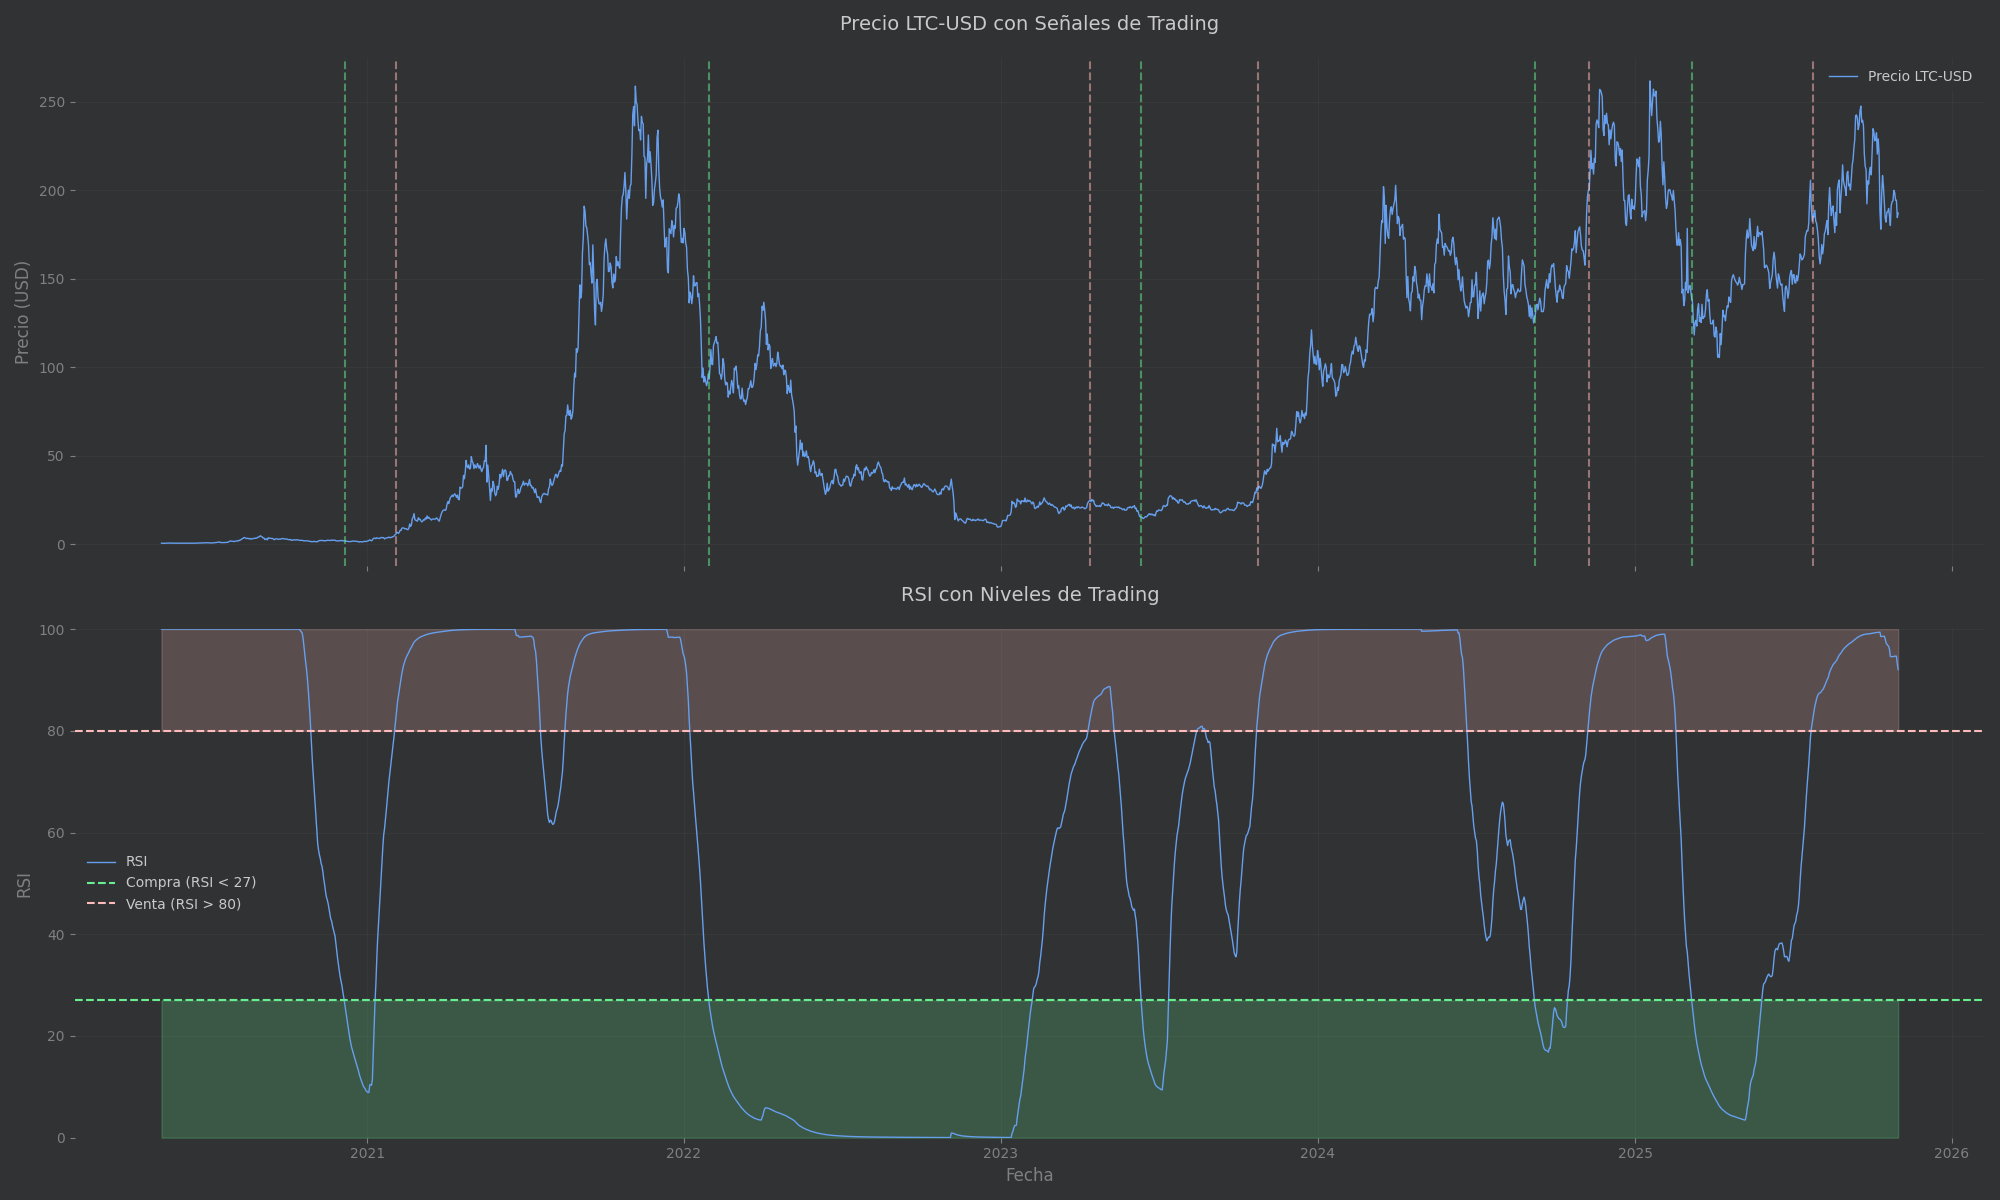

In [36]:
if len(operations_df) > 0:

    
    # Visualización
    fig, axes = plt.subplots(2, 1, figsize=(20, 12), sharex=True)
    
    # Gráfico 1: Precio y señales de trading
    ax1 = axes[0]
    ax1.plot(df.index, df['close'], label='Precio LTC-USD', linewidth=1)
    
    # Marcar compras y ventas
    for _, op in operations_df.iterrows():
        ax1.axvline(x=op['fecha_compra'], color='#66EE91', linestyle='--', alpha=0.5)
        ax1.axvline(x=op['fecha_venta'], color='#FFBBBB', linestyle='--', alpha=0.5)
    
    ax1.set_title('Precio LTC-USD con Señales de Trading', fontsize=14, pad=20)
    ax1.set_ylabel('Precio (USD)', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Gráfico 2: RSI
    ax2 = axes[1]
    ax2.plot(df.index, df['RSI'], label='RSI', linewidth=1, color='#669FEE')
    ax2.axhline(y=27, color='#66EE91', linestyle='--', label='Compra (RSI < 27)')
    ax2.axhline(y=80, color='#FFBBBB', linestyle='--', label='Venta (RSI > 80)')
    ax2.fill_between(df.index, 0, 27, alpha=0.2, color='#66EE91')
    ax2.fill_between(df.index, 80, 100, alpha=0.2, color='#FFBBBB')
    
    ax2.set_title('RSI con Niveles de Trading', fontsize=14, pad=20)
    ax2.set_ylabel('RSI', fontsize=12)
    ax2.set_xlabel('Fecha', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(0, 100)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("\n⚠ No se ejecutaron operaciones con los criterios establecidos.")
    print("Considera ajustar los umbrales de RSI o el período de datos.")

## Realiza el procedimiento con multiples Tickers

In [39]:
tickers = [
    # CRYPTOMONEDAS (Los 10-15 principales por capitalización)
    "BTC-USD",   # Bitcoin
    "ETH-USD",   # Ethereum
    "SOL-USD",   # Solana
    "BNB-USD",   # Binance Coin
    "XRP-USD",   # Ripple
    "ADA-USD",   # Cardano
    "DOGE-USD",  # Dogecoin
    "AVAX-USD",  # Avalanche
    "DOT-USD",   # Polkadot
    "LINK-USD",  # Chainlink
    "LTC-USD",   # Litecoin
    "UNI-USD",   # Uniswap
    "SHIB-USD",  # Shiba Inu
    "ICP-USD",   # Internet Computer
    
    # ACCIONES (Gigantes Tech, Industriales, Salud, Financieros)
    
    # Tecnología y Comunicación (EE. UU.)
    "AAPL",      # Apple
    "MSFT",      # Microsoft
    "GOOGL",     # Alphabet (Google) - Clase A
    "AMZN",      # Amazon
    "NVDA",      # NVIDIA
    "TSLA",      # Tesla
    "META",      # Meta Platforms
    "ADBE",      # Adobe
    "CRM",       # Salesforce
    "NFLX",      # Netflix
    "ORCL",      # Oracle
    "CSCO",      # Cisco
    "INTC",      # Intel
    "PYPL",      # PayPal
    "ZM",        # Zoom Video
    
    # Sector Financiero (EE. UU.)
    "JPM",       # JPMorgan Chase
    "BAC",       # Bank of America
    "WFC",       # Wells Fargo
    "V",         # Visa
    "MA",        # Mastercard
    "GS",        # Goldman Sachs
    "MS",        # Morgan Stanley
    
    # Sector Salud y Consumo (EE. UU.)
    "JNJ",       # Johnson & Johnson
    "UNH",       # UnitedHealth Group
    "PFE",       # Pfizer
    "MRNA",      # Moderna
    "KO",        # Coca-Cola
    "PEP",       # PepsiCo
    "PG",        # Procter & Gamble
    "WMT",       # Walmart
    "COST",      # Costco Wholesale
    "HD",        # Home Depot
    
    # Globales / No-EE. UU.
    "BABA",      # Alibaba Group (China)
    "ASML",      # ASML Holding (Países Bajos)
    "TSM",       # Taiwan Semiconductor (Taiwán)
    "TM",        # Toyota Motor (Japón)
    "SHEL",      # Shell PLC (Reino Unido/Países Bajos)
    "RY.TO",     # Royal Bank of Canada (Canadá)
    "NVO",       # Novo Nordisk (Dinamarca)
    
    # COMMODITIES (Materias Primas) - Uso de "=F" para Futuros / Spot
    "GC=F",      # Oro
    "SI=F",      # Plata
    "PL=F",      # Platino
    "CL=F",      # Petróleo Crudo WTI
    "BZ=F",      # Petróleo Crudo Brent
    "NG=F",      # Gas Natural
    "HG=F",      # Cobre
    "ZC=F",      # Maíz
    "ZS=F",      # Soja
    "CT=F",      # Algodón (Cotton Futures)
    
    # DIVISAS (FOREX - Pares Mayores y Cruces Clave) - Uso de "=X"
    "EURUSD=X",  # Euro / Dólar estadounidense
    "USDJPY=X",  # Dólar estadounidense / Yen japonés
    "GBPUSD=X",  # Libra esterlina / Dólar estadounidense
    "USDCHF=X",  # Dólar estadounidense / Franco suizo
    "AUDUSD=X",  # Dólar australiano / Dólar estadounidense
    "USDCAD=X",  # Dólar estadounidense / Dólar canadiense
    "EURGBP=X",  # Euro / Libra esterlina
    "EURJPY=X",  # Euro / Yen japonés
    "GBPJPY=X",  # Libra esterlina / Yen japonés
    "USDMXN=X",  # Dólar estadounidense / Peso mexicano
    "USDRUB=X",  # Dólar estadounidense / Rublo ruso
    "USDZAR=X",  # Dólar estadounidense / Rand sudafricano
    
    # ETFs (Fondos Cotizados en Bolsa) - Amplia Variedad (Índices, Sectorial, Geográfico)
    
    # Índices Amplios
    "SPY",       # S&P 500
    "IVV",       # S&P 500
    "QQQ",       # Nasdaq 100
    "DIA",       # Dow Jones
    "VTI",       # Mercado Total EE. UU.
    "VT",        # Vanguard Total World Stock ETF (Global)
    
    # Sectorial y Temático
    "XLK",       # Tecnología Sectorial
    "XLF",       # Financiero Sectorial
    "XLE",       # Energía Sectorial
    "XLP",       # Consumo Básico Sectorial
    "XLV",       # Salud Sectorial
    "SMH",       # Semiconductores
    "ICLN",      # Energía Limpia
    "ARKK",      # Innovación Disruptiva
    "GLD",       # Oro Físico
    "SLV",       # Plata Física
    
    # Geográfico y Bonos
    "VEA",       # Desarrollados ex-EE. UU.
    "VWO",       # Mercados Emergentes
    "EFA",       # Desarrollados (Europa, Australasia, Lejano Oriente)
    "FXI",       # China Large-Cap
    "AGG",       # Bonos Agregados EE. UU.
    "BND"        # Bonos Totales
]

def prepare_data(ticker, start_date="2010-01-01"):
    """
    Descarga y prepara los datos para un ticker específico
    """
    print(f"Descargando datos para {ticker}...")
    
    try:
        df = yf.download(ticker, start=start_date, progress=False)
        
        if df.empty:
            print(f"  ⚠ No hay datos disponibles para {ticker}")
            return None
        
        # Solución al problema MultiIndex
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.get_level_values(0)
        
        # Preparar DataFrame
        df['date'] = pd.to_datetime(df.index)
        df['date_num'] = df['date'].apply(mpl_dates.date2num)
        
        # Renombrar columnas
        df = df.rename(columns={
            'Open': 'open', 
            'High': 'high', 
            'Low': 'low', 
            'Close': 'close', 
            'Adj Close': 'adj_close',
            'Volume': 'volume'
        })
        
        # Calcular indicadores
        window = 150
        df["SMA slow"] = df["close"].rolling(window).mean()
        df["EMA"] = df["close"].ewm(span=window, adjust=False).mean()
        
        def weighted_moving_average(series, period):
            weights = np.arange(1, period + 1)
            return series.rolling(period).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)
        
        df["WMA"] = weighted_moving_average(df["close"], window)
        df['RSI'] = ta.momentum.rsi(df["WMA"], window=30)
        
        # Eliminar filas con NaN en RSI
        df = df.dropna(subset=['RSI'])
        
        print(f"  ✓ Datos preparados: {len(df)} registros desde {df['date'].min().date()} hasta {df['date'].max().date()}")
        return df
        
    except Exception as e:
        print(f"  ✗ Error al descargar {ticker}: {str(e)}")
        return None

def calculate_operation_metrics(df, entry_idx, exit_idx, entry_price, exit_price, entry_date, exit_date):
    """
    Calcula todas las métricas para una operación
    """
    # Extraer datos de la operación
    operation_df = df.loc[entry_idx:exit_idx].copy()
    
    # 1. Duración en días
    duration_days = (exit_date - entry_date).days
    
    # 2. Rendimiento total (%)
    total_return = ((exit_price - entry_price) / entry_price) * 100
    
    # 3. Drawdown máximo (%)
    operation_df['return_from_entry'] = ((operation_df['close'] - entry_price) / entry_price) * 100
    max_drawdown = operation_df['return_from_entry'].min()
    
    # 4. Días para alcanzar objetivos
    targets = [10, 20, 30, 50, 70, 80, 100]
    days_to_target = {}
    
    for target in targets:
        days = calculate_days_to_target(operation_df, entry_price, entry_date, target)
        days_to_target[f'dias_para_{target}%'] = days
    
    # Crear diccionario con todos los datos
    operation_data = {
        'fecha_compra': entry_date,
        'fecha_venta': exit_date,
        'precio_compra': entry_price,
        'precio_venta': exit_price,
        'duracion_dias': duration_days,
        'rendimiento_%': total_return,
        'drawdown_max_%': max_drawdown,
        **days_to_target
    }
    
    return operation_data

def calculate_days_to_target(operation_df, entry_price, entry_date, target_percent):
    """
    Calcula cuántos días tardó en alcanzar un objetivo de rendimiento
    """
    for idx, row in operation_df.iterrows():
        current_return = ((row['close'] - entry_price) / entry_price) * 100
        if current_return >= target_percent:
            days = (row['date'] - entry_date).days
            return days
    return np.nan

def simulate_trading(df, ticker):
    """
    Simula operaciones de trading basadas en RSI
    Compra: RSI < 27
    Venta: RSI > 80
    """
    operations = []
    in_position = False
    entry_date = None
    entry_price = None
    entry_idx = None
    
    for idx, row in df.iterrows():
        rsi = row['RSI']
        close_price = row['close']
        
        # Señal de COMPRA
        if not in_position and rsi < 27:
            in_position = True
            entry_date = row['date']
            entry_price = close_price
            entry_idx = idx
            
        # Señal de VENTA
        elif in_position and rsi > 80:
            exit_date = row['date']
            exit_price = close_price
            
            # Calcular métricas de la operación
            operation_data = calculate_operation_metrics(
                df, entry_idx, idx, entry_price, exit_price, entry_date, exit_date
            )
            
            # Agregar el ticker a la operación
            operation_data['ticker'] = ticker
            
            operations.append(operation_data)
            
            # Resetear posición
            in_position = False
            entry_date = None
            entry_price = None
            entry_idx = None
    
    return operations
all_operations = []
for ticker in tickers:
    df = prepare_data(ticker)
    
    if df is not None:
        operations = simulate_trading(df, ticker)
        all_operations.extend(operations)
        print(f"  → {len(operations)} operaciones encontradas para {ticker}")
    print()

Descargando datos para BTC-USD...
  ✓ Datos preparados: 4034 registros desde 2014-10-16 hasta 2025-10-31
  → 9 operaciones encontradas para BTC-USD

Descargando datos para ETH-USD...
  ✓ Datos preparados: 2885 registros desde 2017-12-08 hasta 2025-10-31
  → 6 operaciones encontradas para ETH-USD

Descargando datos para SOL-USD...
  ✓ Datos preparados: 2002 registros desde 2020-05-09 hasta 2025-10-31
  → 5 operaciones encontradas para SOL-USD

Descargando datos para BNB-USD...
  ✓ Datos preparados: 2885 registros desde 2017-12-08 hasta 2025-10-31
  → 6 operaciones encontradas para BNB-USD

Descargando datos para XRP-USD...
  ✓ Datos preparados: 2885 registros desde 2017-12-08 hasta 2025-10-31
  → 6 operaciones encontradas para XRP-USD

Descargando datos para ADA-USD...
  ✓ Datos preparados: 2885 registros desde 2017-12-08 hasta 2025-10-31
  → 7 operaciones encontradas para ADA-USD

Descargando datos para DOGE-USD...
  ✓ Datos preparados: 2885 registros desde 2017-12-08 hasta 2025-10-31


In [41]:
# Dataframe

if len(all_operations) > 0:
    operations_df = pd.DataFrame(all_operations)
    
    # Reorganizar columnas para que 'ticker' esté al principio
    cols = ['ticker'] + [col for col in operations_df.columns if col != 'ticker']
    operations_df = operations_df[cols]
    
    # Ordenar por fecha de compra
    operations_df = operations_df.sort_values('rendimiento_%', ascending=True).reset_index(drop=True)
operations_df.head(20)

,ticker,fecha_compra,fecha_venta,precio_compra,precio_venta,duracion_dias,rendimiento_%,drawdown_max_%,dias_para_10%,dias_para_20%,dias_para_30%,dias_para_50%,dias_para_70%,dias_para_80%,dias_para_100%
0,ICP-USD,2021-10-07,2023-03-21,50.995556,5.278292,530,-89.649506,-93.160767,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SOL-USD,2022-02-10,2023-04-20,106.202805,22.181440,434,-79.114073,-90.911932,48.0,50.0,NaN,NaN,NaN,NaN,NaN
2,AVAX-USD,2022-04-19,2023-04-01,80.285919,17.662683,347,-78.000272,-86.465976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ZM,2021-04-07,2024-10-22,323.079987,72.220001,1294,-77.646402,-82.877305,65.0,82.0,NaN,NaN,NaN,NaN,NaN
4,PYPL,2021-11-09,2024-04-15,205.419998,63.509998,888,-69.082855,-75.469769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,DOT-USD,2022-01-23,2023-04-08,18.828775,6.135957,440,-67.411812,-77.255776,13.0,69.0,NaN,NaN,NaN,NaN,NaN
6,ARKK,2021-08-12,2023-06-12,119.852760,42.922035,669,-64.187696,-75.474197,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ADA-USD,2021-12-14,2023-04-14,1.222835,0.438330,486,-64.154607,-80.034918,9.0,9.0,34.0,NaN,NaN,NaN,NaN
8,LINK-USD,2021-12-30,2023-04-12,19.970343,7.250481,468,-63.693757,-72.622178,4.0,6.0,10.0,NaN,NaN,NaN,NaN
9,LTC-USD,2018-04-30,2019-03-28,148.477005,61.170486,332,-58.801374,-84.196657,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
if len(all_operations) > 0:
    print("="*80)
    print("RESULTADOS CONSOLIDADOS DE TODAS LAS OPERACIONES")
    print("="*80)
    print(f"\nTotal de operaciones ejecutadas: {len(operations_df)}")
    print(f"Criptomonedas analizadas: {len(tickers)}")
    
    print(f"\nRendimiento promedio: {operations_df['rendimiento_%'].mean():.2f}%")
    print(f"Rendimiento mediano: {operations_df['rendimiento_%'].median():.2f}%")
    print(f"Mejor operación: {operations_df['rendimiento_%'].max():.2f}%")
    print(f"Peor operación: {operations_df['rendimiento_%'].min():.2f}%")
    print(f"\nDrawdown promedio: {operations_df['drawdown_max_%'].mean():.2f}%")
    print(f"Peor drawdown: {operations_df['drawdown_max_%'].min():.2f}%")
    print(f"\nDuración promedio: {operations_df['duracion_dias'].mean():.1f} días")
    
    # Estadísticas por ticker
    print("\n" + "="*80)
    print("RESUMEN POR CRIPTOMONEDA")
    print("="*80)
    summary_by_ticker = operations_df.groupby('ticker').agg({
        'rendimiento_%': ['count', 'mean', 'median', 'max', 'min'],
        'duracion_dias': 'mean',
        'drawdown_max_%': 'mean'}).round(2)

RESULTADOS CONSOLIDADOS DE TODAS LAS OPERACIONES

Total de operaciones ejecutadas: 730
Criptomonedas analizadas: 97

Rendimiento promedio: 942.94%
Rendimiento mediano: 9.25%
Mejor operación: 679619.31%
Peor operación: -89.65%

Drawdown promedio: -13.41%
Peor drawdown: -177.22%

Duración promedio: 232.1 días

RESUMEN POR CRIPTOMONEDA


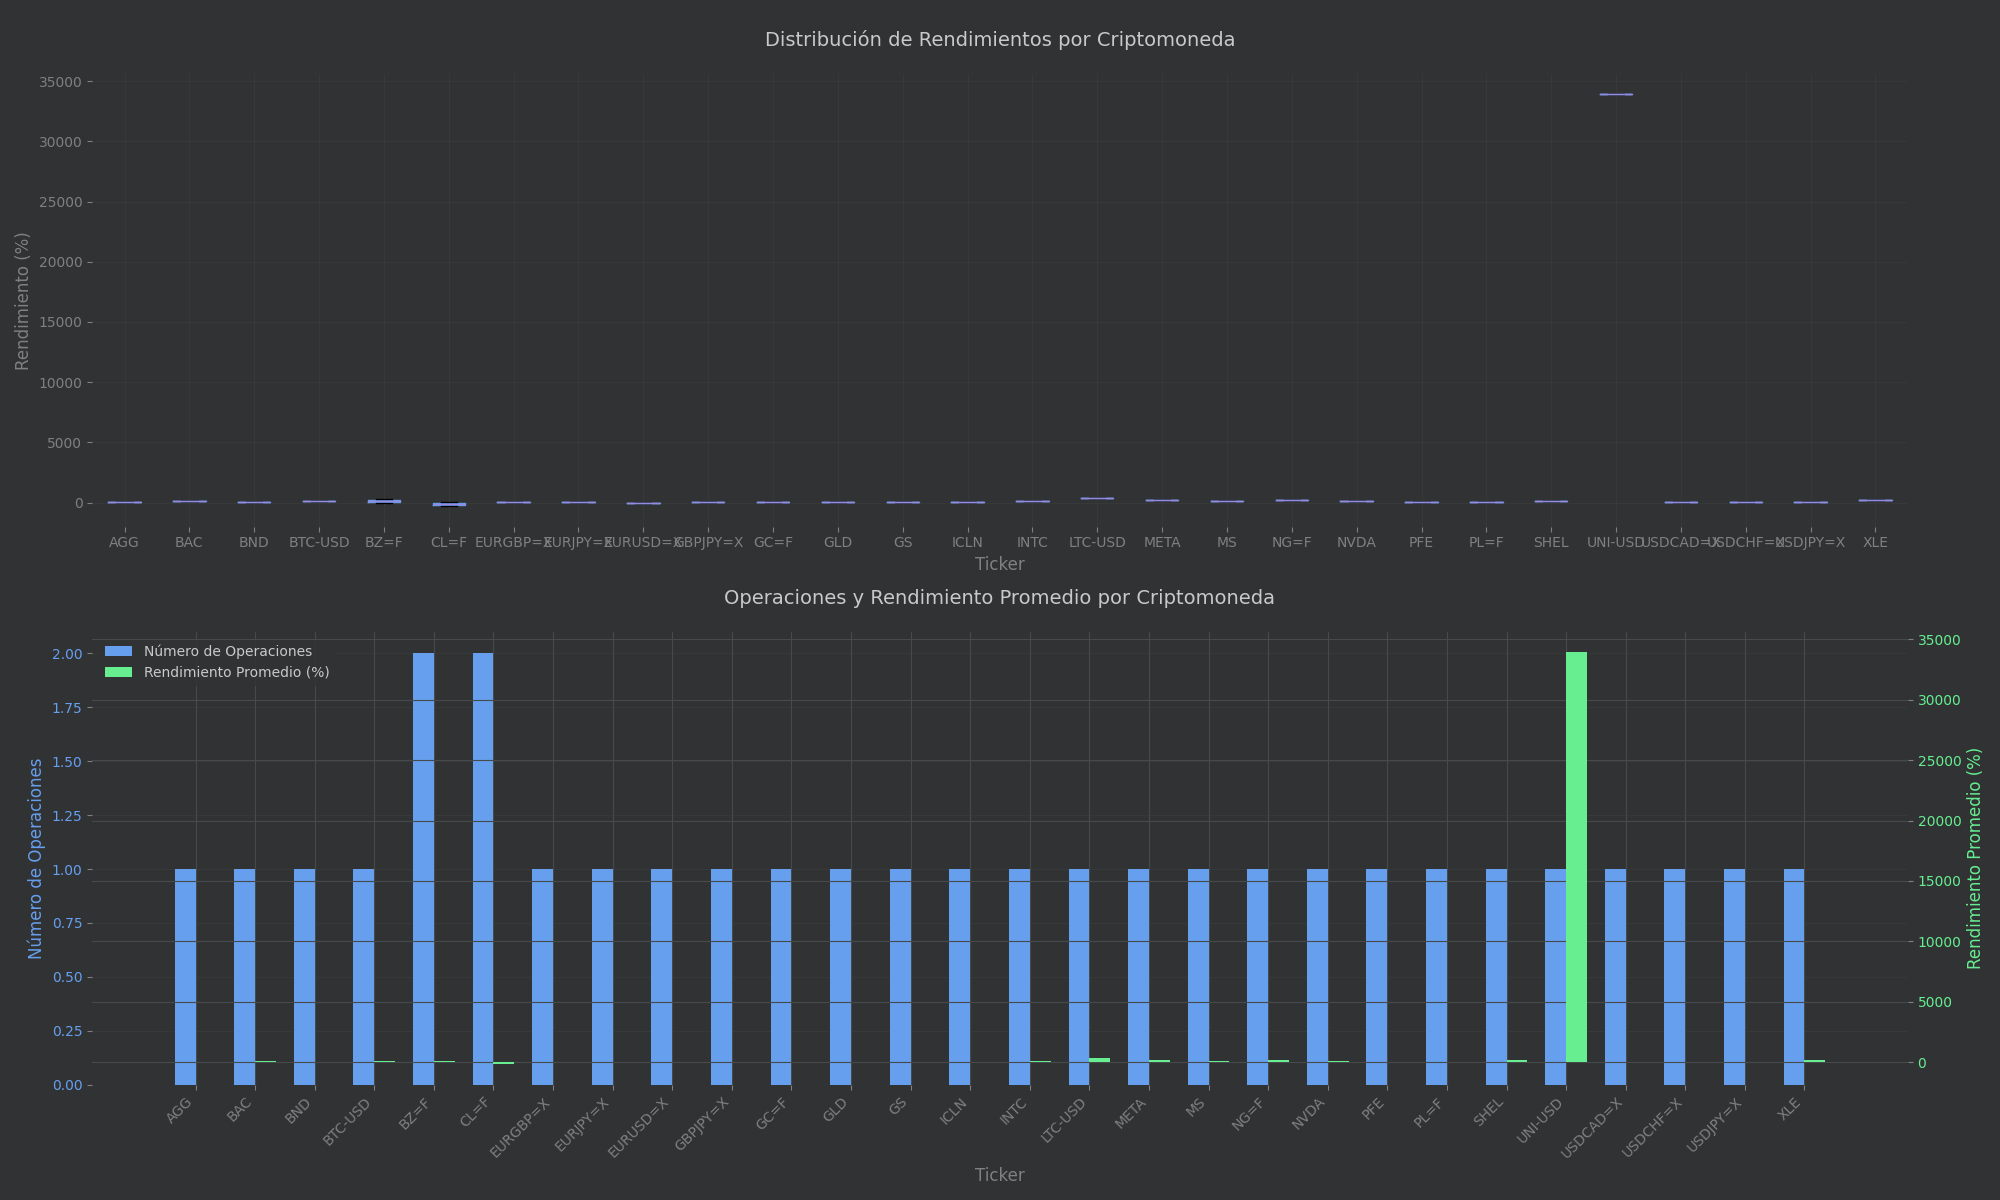

In [ ]:
#Grafica comparativa

if len(all_operations) > 0:
    # Visualización comparativa
    fig, axes = plt.subplots(2, 1, figsize=(20, 12))
    
    # Gráfico 1: Distribución de rendimientos por ticker
    ax1 = axes[0]
    operations_df.boxplot(column='rendimiento_%', by='ticker', ax=ax1)
    ax1.set_title('Distribución de Rendimientos por Criptomoneda', fontsize=14, pad=20)
    ax1.set_xlabel('Ticker', fontsize=12)
    ax1.set_ylabel('Rendimiento (%)', fontsize=12)
    ax1.grid(True, alpha=0.3)
    plt.suptitle('')  # Remover título automático
    
    # Gráfico 2: Número de operaciones y rendimiento promedio por ticker
    ax2 = axes[1]
    summary = operations_df.groupby('ticker').agg({
        'rendimiento_%': ['count', 'mean']
    })
    summary.columns = ['Operaciones', 'Rendimiento Promedio']
    
    x = np.arange(len(summary))
    width = 0.35
    
    ax2_twin = ax2.twinx()
    
    bars1 = ax2.bar(x - width/2, summary['Operaciones'], width, label='Número de Operaciones', color='#669FEE')
    bars2 = ax2_twin.bar(x + width/2, summary['Rendimiento Promedio'], width, label='Rendimiento Promedio (%)', color='#66EE91')
    
    ax2.set_xlabel('Ticker', fontsize=12)
    ax2.set_ylabel('Número de Operaciones', fontsize=12, color='#669FEE')
    ax2_twin.set_ylabel('Rendimiento Promedio (%)', fontsize=12, color='#66EE91')
    ax2.set_title('Operaciones y Rendimiento Promedio por Criptomoneda', fontsize=14, pad=20)
    ax2.set_xticks(x)
    ax2.set_xticklabels(summary.index, rotation=45, ha='right')
    ax2.tick_params(axis='y', labelcolor='#669FEE')
    ax2_twin.tick_params(axis='y', labelcolor='#66EE91')
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Añadir leyendas
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    plt.tight_layout()
    plt.show()
    




# Buscador de la mejor estrategia